In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Charger les données
df = pd.read_csv('dataset_clean.csv')


# Calculer les buts nets
df['net_goals'] = df['player_goals'] - df['player_own_goals']

# Grouper par joueur et calculer les statistiques
top_scorers = (df.groupby(['user_id', 'name', 'surname'])
               .agg({
                   'player_goals': 'sum',
                   'player_own_goals': 'sum',
                   'net_goals': 'sum',
                   'game_id': 'count'
               })
               .rename(columns={
                   'player_goals': 'buts_marques',
                   'player_own_goals': 'buts_csc',
                   'net_goals': 'buts_nets',
                   'game_id': 'matchs_joues'
               })
               .reset_index())

# Calculer le ratio buts nets / matchs
top_scorers['ratio'] = top_scorers['buts_nets'] / top_scorers['matchs_joues']

# Trier par ratio décroissant et prendre le top 10
top_scorers = top_scorers.sort_values('ratio', ascending=False).head(10)

top_scorers = top_scorers.reset_index(drop=True)

print("\n🏆 TOP 10 MEILLEURS BUTEURS (par ratio buts nets/match) 🏆\n")
for i, row in top_scorers.iterrows():
    print(f"{i+1}. {row['name']} {row['surname']}")
    print(f"   Ratio: {row['ratio']:.2f} buts/match")
    print(f"   Buts nets: {row['buts_nets']} ({row['buts_marques']} marqués - {row['buts_csc']} CSC)")
    print(f"   Matchs: {row['matchs_joues']}\n")



🏆 TOP 10 MEILLEURS BUTEURS (par ratio buts nets/match) 🏆

1. Luc LAURENT
   Ratio: 3.35 buts/match
   Buts nets: 281 (282 marqués - 1 CSC)
   Matchs: 84

2. Hugo MOREL
   Ratio: 3.32 buts/match
   Buts nets: 302 (306 marqués - 4 CSC)
   Matchs: 91

3. Mateo SILVA
   Ratio: 3.30 buts/match
   Buts nets: 347 (348 marqués - 1 CSC)
   Matchs: 105

4. Morgan NAKAMURA
   Ratio: 3.25 buts/match
   Buts nets: 283 (285 marqués - 2 CSC)
   Matchs: 87

5. Riley KIM
   Ratio: 3.16 buts/match
   Buts nets: 322 (323 marqués - 1 CSC)
   Matchs: 102

6. Mila PETIT
   Ratio: 3.15 buts/match
   Buts nets: 309 (310 marqués - 1 CSC)
   Matchs: 98

7. Mateo MULLER
   Ratio: 3.15 buts/match
   Buts nets: 315 (317 marqués - 2 CSC)
   Matchs: 100

8. Julie ANDRE
   Ratio: 3.15 buts/match
   Buts nets: 362 (364 marqués - 2 CSC)
   Matchs: 115

9. Julien LEROY
   Ratio: 3.13 buts/match
   Buts nets: 291 (291 marqués - 0 CSC)
   Matchs: 93

10. Jamie MARTIN
   Ratio: 3.11 buts/match
   Buts nets: 308 (314 marqu

In [14]:
# Top 5 défeuseurs

# Filtrer les défenseurs et calculer le score défensif
defenders = df[df['role'] == 'DEF'].copy()
defenders['def_score'] = defenders['player_saves'] - defenders['player_own_goals']

top_defenders = (defenders.groupby(['user_id', 'name', 'surname'])
                 .agg({
                     'def_score': 'sum',
                     'player_saves': 'sum',
                     'player_own_goals': 'sum',
                     'game_id': 'count'
                 })
                 .rename(columns={
                     'def_score': 'score_defensif',
                     'player_saves': 'total_arrets',
                     'player_own_goals': 'buts_csc',
                     'game_id': 'matchs_joues'
                 })
                 .sort_values('score_defensif', ascending=False)
                 .head(5)
                 .reset_index())


print("\n🛡️ TOP 5 MEILLEURS DÉFENSEURS (Score = Arrêts - CSC) 🛡️\n")
for i, row in top_defenders.iterrows():
    print(f"{i+1}. {row['name']} {row['surname']}")
    print(f"   Score: {row['score_defensif']} "
          f"({row['total_arrets']} arrêts - {row['buts_csc']} CSC) | "
          f"{row['matchs_joues']} matchs\n")



🛡️ TOP 5 MEILLEURS DÉFENSEURS (Score = Arrêts - CSC) 🛡️

1. Ava ANDRE
   Score: 427 (430 arrêts - 3 CSC) | 75 matchs

2. Mateo LEROY
   Score: 414 (419 arrêts - 5 CSC) | 81 matchs

3. Mila ROSSI
   Score: 403 (407 arrêts - 4 CSC) | 73 matchs

4. Casey NAKAMURA
   Score: 402 (404 arrêts - 2 CSC) | 87 matchs

5. Hugo GARCIA
   Score: 401 (402 arrêts - 1 CSC) | 81 matchs




📊 ANALYSE DE L'INFLUENCE DU CAMP 📊

Total de parties: 19759
Parties avec victoire RED/BLUE: 18002
Victoires ROUGE: 9094 (50.5%)
Victoires BLEUE: 8908 (49.5%)

📈 Test du Chi-2:
Statistique Chi-2: 1.92
P-value: 0.1657
❌ Pas de différence significative (p ≥ 0.05)
   → Le choix du camp N'influence PAS le résultat

⚽ Moyenne de buts marqués par équipe:
ROUGE: 5.01 buts/match
BLEUE: 5.01 buts/match
Différence moyenne: 0.00 buts

🔍 Répartition complète des résultats:
winner
RED     9094
BLUE    8908
TIE     1757
Name: count, dtype: int64


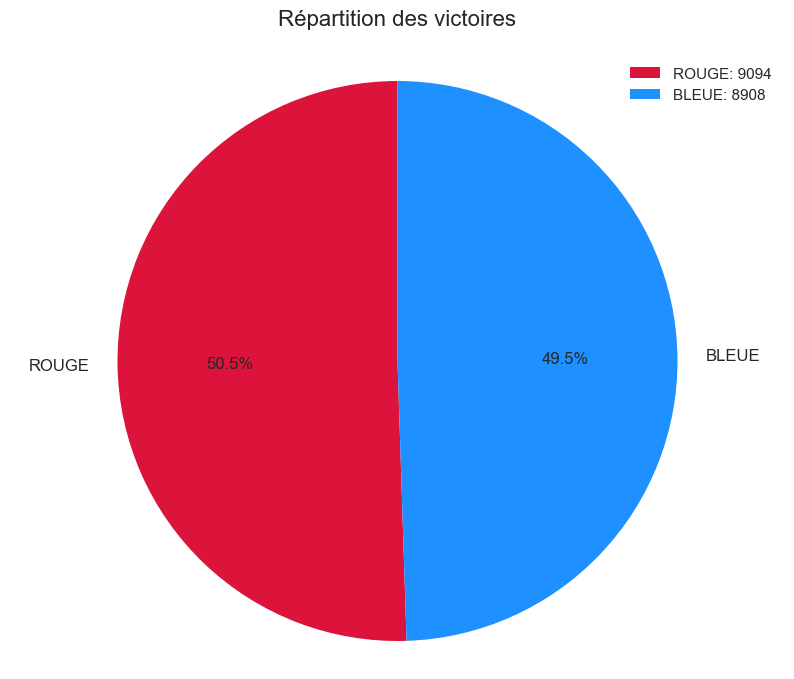

In [8]:
import pandas as pd
from scipy.stats import chisquare

# Garder une seule ligne par partie
games = df.drop_duplicates(subset='game_id')

# Analyser les victoires par équipe
team_stats = games['winner'].value_counts()
red_wins = team_stats.get('RED', 0)
blue_wins = team_stats.get('BLUE', 0)
total_decisive_games = red_wins + blue_wins  # Seulement les parties avec victoire RED ou BLUE

print("\n📊 ANALYSE DE L'INFLUENCE DU CAMP 📊\n")
print(f"Total de parties: {len(games)}")
print(f"Parties avec victoire RED/BLUE: {total_decisive_games}")
print(f"Victoires ROUGE: {red_wins} ({red_wins/total_decisive_games*100:.1f}%)")
print(f"Victoires BLEUE: {blue_wins} ({blue_wins/total_decisive_games*100:.1f}%)")

# Test statistique du Chi-2
observed = [red_wins, blue_wins]
expected = [total_decisive_games/2, total_decisive_games/2]
chi2, p_value = chisquare(observed, expected)

print(f"\n📈 Test du Chi-2:")
print(f"Statistique Chi-2: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Il existe une différence SIGNIFICATIVE (p < 0.05)")
    print("   → Le choix du camp influence le résultat")
else:
    print("❌ Pas de différence significative (p ≥ 0.05)")
    print("   → Le choix du camp N'influence PAS le résultat")

# Analyse par nombre de buts
print("\n⚽ Moyenne de buts marqués par équipe:")
print(f"ROUGE: {games['red_goal'].mean():.2f} buts/match")
print(f"BLEUE: {games['blue_goal'].mean():.2f} buts/match")
print(f"Différence moyenne: {abs(games['red_goal'].mean() - games['blue_goal'].mean()):.2f} buts")

# Vérifier s'il y a d'autres valeurs dans winner
print("\n🔍 Répartition complète des résultats:")
print(games['winner'].value_counts())

# Affichage d'un pie chart
plt.figure(figsize=(10, 8))

sizes = [red_wins, blue_wins]
labels = ['ROUGE', 'BLEUE']
colors = ['#DC143C', '#1E90FF']

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', startangle=90,
        textprops={'fontsize': 12})

plt.title('Répartition des victoires', fontsize=16, pad=20)

# Ajouter légende avec nombre de victoires
plt.legend([f'ROUGE: {red_wins}', f'BLEUE: {blue_wins}'], 
           loc='upper right', fontsize=11)

plt.axis('equal')
plt.show()
